In [111]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
   

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

In [12]:
# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

In [2]:
apps_with_duplicates.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [62]:
apps_with_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [11]:
apps_with_duplicates['Content Rating'].nunique()

remove $ sign

In [58]:
apps['Installs'] = apps['Installs'].str.replace(',','')
apps['Installs']=apps['Installs'].astype('int')

In [69]:
apps['Price'] = apps['Price'].str.replace('$','')
apps['Price']=apps['Price'].astype('float')

C:\Users\zhe\AppData\Local\Temp/ipykernel_10132/2782994162.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps['Price'] = apps['Price'].str.replace('$','')


exploring App categories

In [71]:
apps['Category'].nunique()
num_apps_in_category = (apps['Category'].value_counts(sort=True, ascending=False))


33

<BarContainer object of 33 artists>

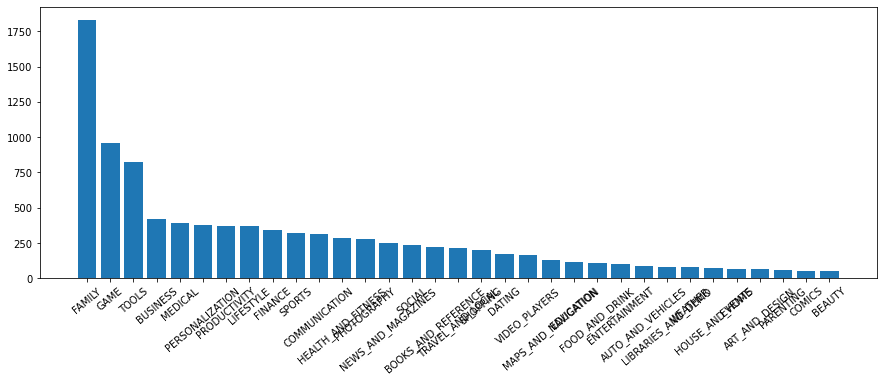

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=40)
ax.bar(num_apps_in_category.index,num_apps_in_category.values)

In [100]:
apps=apps.dropna()

size vs rating <p>
price vs rating <p>

C:\Users\zhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


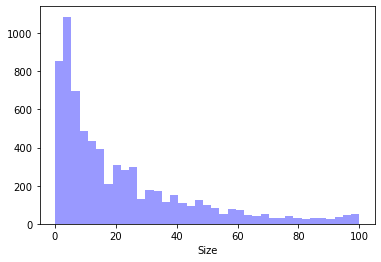

In [104]:
plot = sns.distplot(apps.Size, kde=False,color="b")

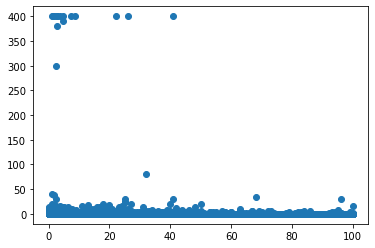

In [113]:
plt.scatter(apps['Size'],apps['Price'])

C:\Users\zhe\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


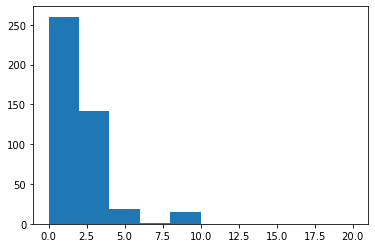

In [112]:
plot = plt.hist(np.log2(apps['Price']),range=(0, 20))

7.relation between app category and app price

In [114]:
apps['Category'].value_counts()

FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

In [116]:
apps_cat_price=apps.groupby('Category')['Price'].mean()

In [118]:
apps_cat_price.values

array([1.02931034e-01, 0.00000000e+00, 0.00000000e+00, 1.48156028e-01,
       2.31621622e-01, 0.00000000e+00, 2.21968085e-01, 1.22786885e-01,
       2.04090909e-01, 4.67187500e-02, 0.00000000e+00, 1.46818663e+00,
       9.45686047e+00, 6.93055556e-02, 3.26189904e-01, 1.80209424e-01,
       0.00000000e+00, 0.00000000e+00, 7.26171004e+00, 1.59148936e-01,
       2.19909774e+00, 2.58441558e-02, 1.13409091e-01, 4.20875912e-01,
       3.25343137e-01, 2.37488789e-01, 3.75342466e-02, 1.26923077e-02,
       3.63031674e-01, 2.93760000e-01, 1.88014184e-01, 8.83928571e-03,
       4.68800000e-01])

<BarContainer object of 33 artists>

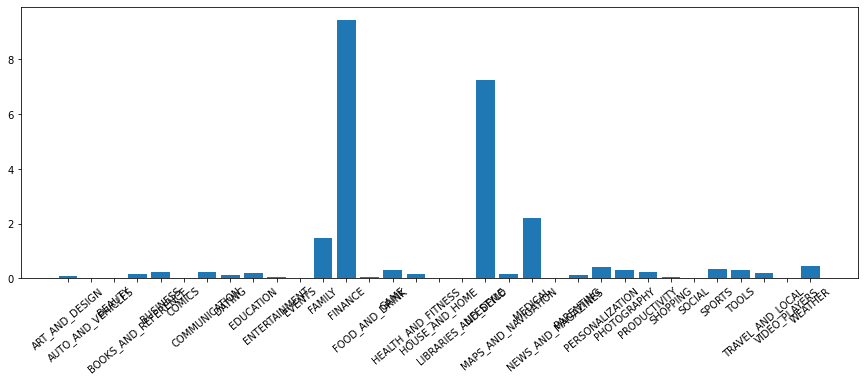

In [125]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=40)
ax.bar(apps_cat_price.index,apps_cat_price.values)

Text(0.5, 1.0, 'App pricing trend across categories')

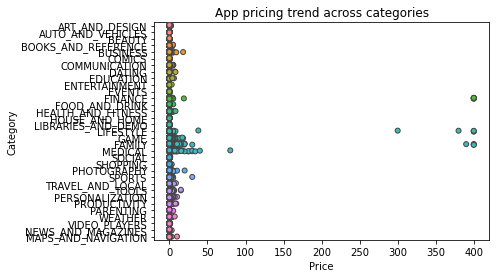

In [122]:
ax = sns.stripplot(x = apps['Price'], y = apps['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

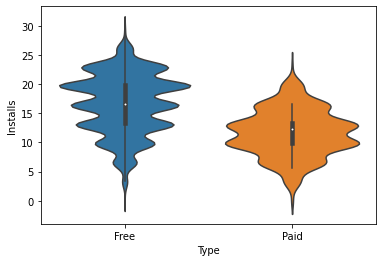

In [130]:
ax = sns.violinplot(x=apps.Type, y=np.log2(apps.Installs))